In [1]:
from fastai.tabular import *
import pandas as pd

In [61]:
df = pd.read_csv("data.csv")

In [62]:
df.head()

,No.,C,Si,Mn,P,S,Cr,Ni,Mo,N,...,Al,Ti,V,B,Th,I,U,Ve,Strain,TCL
0,1,0.010,0.48,1.61,0.024,0.019,17.33,10.62,2.09,0.060,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5
1,2,0.011,0.58,1.06,0.032,0.013,16.95,10.50,2.15,0.078,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.1
2,3,0.010,0.46,1.09,0.021,0.001,17.40,11.50,2.88,0.105,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,0.9
3,4,0.010,0.51,1.60,0.021,0.001,17.55,12.95,2.76,0.113,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,3.7
4,5,0.012,0.46,1.54,0.027,0.023,16.28,10.15,2.06,0.098,...,0.02,0.0,0.0,0.0,3.18,100,12.0,4.23,4.0,1.5


In [63]:
df.drop(columns = ["No."],inplace = True)

In [78]:
cont_names = ['C','Si','Mn','P','S','Cr','Ni','Mo','N','Nb','Co','Cu','Al','Ti']
cat_names = ['V','B','Th','U','Ve','Strain','I']
dep_var = "TCL"

In [71]:
def calcHiddenLayer(data, alpha, numHiddenLayers):
    i,o = len(data.x.col_names), data.y.c
    io = i+o
    return [(len(data.train_ds)//(alpha*(io)))//numHiddenLayers]*numHiddenLayers

In [72]:
procs = [FillMissing, Categorify, Normalize]

In [73]:
msk = np.random.rand(len(df)) < 0.2
valid_ds = df[msk]

In [74]:
valid_idx = list(valid_ds.index)

In [79]:
import os
data = TabularDataBunch.from_df(path=os.getcwd(), df=df, dep_var=dep_var, valid_idx=valid_idx, procs=procs, cont_names=cont_names, cat_names=cat_names)

In [85]:
calcHiddenLayer(data, 2, 1)

[9]

In [95]:
learn = tabular_learner(data, layers=[9], metrics=[mean_absolute_error, root_mean_squared_error])

In [96]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.92E-06
Min loss divided by 10: 2.75E-01


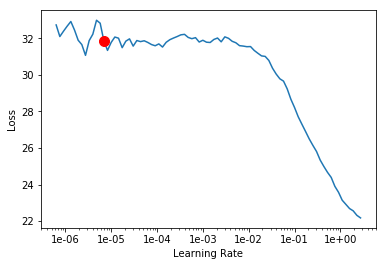

In [97]:
learn.recorder.plot(suggestion=True)

In [98]:
learn.fit_one_cycle(5, max_lr = 1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,30.524830,23.453371,3.706854,4.833099,00:00
1,23.034428,12.365290,2.836527,3.510234,00:00
2,17.795366,8.743823,2.233821,2.956813,00:00
3,14.611320,6.340518,1.970085,2.511945,00:00
4,12.347331,6.201252,1.963560,2.485850,00:00


In [99]:
inputs = 21
outputs = 1
middle_layer = (inputs+outputs)//2
middle_layer

11

In [100]:
learn = tabular_learner(data, layers=[11], metrics=[mean_absolute_error, root_mean_squared_error])

In [101]:
learn.fit_one_cycle(5, max_lr = 1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,32.184830,21.437151,3.428378,4.621388,00:00
1,24.351961,22.152716,3.976638,4.703826,00:00
2,18.826508,6.362975,1.891353,2.520837,00:00
3,15.566131,7.038882,2.070485,2.646479,00:00
4,13.404283,6.738668,2.053190,2.589761,00:00


In [102]:
learn = tabular_learner(data, layers=[20], metrics=[mean_absolute_error, root_mean_squared_error])

In [103]:
learn.fit_one_cycle(5, max_lr = 1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,33.306828,24.591808,3.884031,4.956658,00:00
1,25.565002,20.649101,3.836945,4.516593,00:00
2,19.814951,8.757591,2.402369,2.956940,00:00
3,16.305552,7.953371,2.236413,2.818896,00:00
4,13.792774,7.137246,2.118973,2.670409,00:00


In [108]:
calcHiddenLayer(data, 3, 1)

[6]

In [105]:
learn = tabular_learner(data, layers=[6], metrics=[mean_absolute_error, root_mean_squared_error])

In [106]:
learn.fit_one_cycle(5, max_lr=1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,33.237007,26.089857,3.922459,5.093184,00:00
1,27.216372,93.895638,8.510842,9.589197,00:00
2,20.296474,27.408485,4.482390,5.203676,00:00
3,16.566236,7.479569,2.006573,2.724801,00:00
4,14.162445,5.980973,1.912308,2.440185,00:00


In [109]:
learn = tabular_learner(data, layers=[5], metrics=[mean_absolute_error, root_mean_squared_error])

In [110]:
learn.fit_one_cycle(5, max_lr=1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,33.355942,24.040083,3.780397,4.895569,00:00
1,25.762760,77.518669,8.079229,8.791197,00:00
2,19.638737,17.434828,3.367863,4.171031,00:00
3,15.848985,8.226268,2.203699,2.866597,00:00
4,13.722357,7.267625,2.123110,2.694446,00:00


In [111]:
calcHiddenLayer(data, 2, 2)

[4, 4]

In [112]:
learn = tabular_learner(data, layers=[4,4], metrics=[mean_absolute_error, root_mean_squared_error])

In [113]:
learn.fit_one_cycle(5, max_lr=1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,30.764019,21.686649,3.353027,4.635959,00:00
1,25.995777,18.540899,3.445519,4.305766,00:00
2,20.582788,17.720509,3.496961,4.195922,00:00
3,17.181013,11.082535,2.667628,3.318028,00:00
4,15.053006,7.635259,2.104199,2.756608,00:00


In [114]:
learn = tabular_learner(data, layers=[8,4], metrics=[mean_absolute_error, root_mean_squared_error])

In [115]:
learn.fit_one_cycle(5, max_lr=1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,32.562374,24.772821,3.676913,4.954849,00:00
1,27.217110,29.429438,4.599150,5.380002,00:00
2,20.019470,20.678720,3.822960,4.492504,00:00
3,16.174650,9.835002,2.323703,3.133130,00:00
4,13.815362,6.826393,1.947844,2.611135,00:00


In [116]:
calcHiddenLayer(data, 0.5, 1)

[36.0]

In [117]:
learn = tabular_learner(data, layers=[36], metrics=[mean_absolute_error, root_mean_squared_error])

In [118]:
learn.fit_one_cycle(5, max_lr=1e-01)

epoch,train_loss,valid_loss,mean_absolute_error,root_mean_squared_error,time
0,32.300953,21.230541,3.449428,4.603887,00:00
1,22.856436,8.410459,2.343571,2.900073,00:00
2,17.251097,7.591360,2.122322,2.753759,00:00
3,14.246803,8.530169,2.158025,2.908570,00:00
4,12.140024,7.167699,2.083409,2.675090,00:00
